# Mental Health Monitoring of Texas Logistics Drivers

In [4]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('mental_health_monitoring_dataset.csv')

In [6]:
data['Date'] = data['Timestamp'].str.slice(0,10)
data['Time'] = data['Timestamp'].str.slice(11)
#Create new columns that split the time and date from 'Timestamp' column

In [7]:
data.drop(columns='Timestamp', inplace= True)
#remove the original 'Timestamp' column because it is redundant

In [8]:
data[data.isnull().any(axis=1)]
#no NaN values 

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Skin_Temperature,Galvanic_Skin_Response,Respiration_Rate,Sleep_Duration,Activity_Levels,Mood,Cognitive_Load,...,Work_Hours,Job_Stressors,Location_Latitude,Location_Longitude,Stress_Level,Mental_Health_History,Resilience_Factors,Mental_Health_Status,Date,Time


Find most common answers for each categorical variable

In [9]:
copy = data.copy()

categorical_variables = copy.select_dtypes(include='object')    
first_row = categorical_variables.mode().loc[0]
modes = pd.DataFrame([first_row])
modes.reset_index(drop=True, inplace=True)
modes.rename(index={0:'Most Common Answer'}, inplace= True)
modes.drop(columns=['Time', 'Date'], inplace= True)
modes

,Mood,Driving_Conditions,Stress_Level,Mental_Health_History,Mental_Health_Status
Most Common Answer,Happy,Good,Low,No,Normal


*Table of modal values for each categorical variable*

Median and mean work hours. Median and mean sleep_duration. median and mean social_interaction. median and mean . . . .etc.    
Feel free to make boxplots with this information if time allows 

In [10]:
copy = data.copy()

medians = copy.select_dtypes(include=['float64', 'int64']).median()
means = copy.select_dtypes(include=['float64', 'int64']).mean()

summary_table = pd.DataFrame([medians, means])
summary_table.reset_index(drop=True, inplace=True)
summary_table.rename(index={0:'Median', 1:'Mean'}, inplace=True)
summary_table.drop(columns=['Location_Latitude', 'Location_Longitude'], inplace=True)
summary_table.round(2)

,Heart_Rate,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Skin_Temperature,Galvanic_Skin_Response,Respiration_Rate,Sleep_Duration,Activity_Levels,Cognitive_Load,Social_Interaction,Route_Duration,Fuel_Consumption,Average_Speed,Work_Hours,Job_Stressors,Resilience_Factors
Median,89.00,134.00,90.00,36.5,0.5,20.00,4.0,10015.00,5.00,4.00,12.00,12.53,70.00,11.00,5.0,5.00
Mean,89.51,134.35,89.48,36.5,0.5,20.49,4.5,10028.98,4.99,4.49,11.98,12.51,69.42,11.49,5.0,4.98


*Table of median and mean values for all numeric variables*

cognitive load v mental health status 

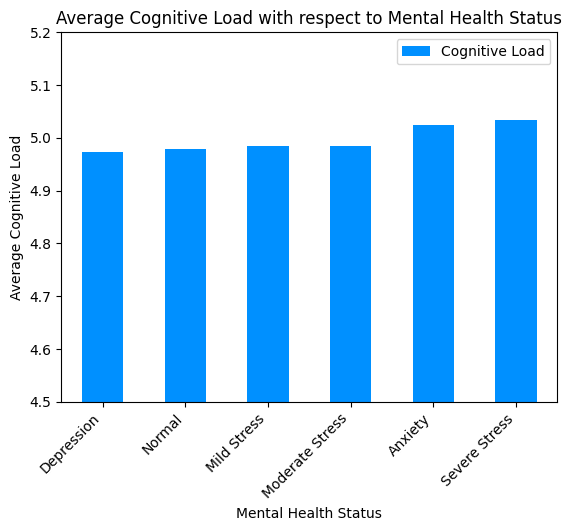

In [11]:
copydata = data.copy()
initialdata = copydata[['Cognitive_Load', 'Mental_Health_Status']]
graphdata = initialdata.groupby(by='Mental_Health_Status').mean().sort_values(by='Cognitive_Load')
graphdata.plot(kind='bar', color = '#0090FF')

plt.legend(labels= ['Cognitive Load'])
plt.ylim(4.5, 5.2)
plt.ylabel('Average Cognitive Load')
plt.xlabel('Mental Health Status')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Average Cognitive Load with respect to Mental Health Status')
plt.show()


*This graph shows the average cognitive load across different mental health statuses. (There is negligible difference between them. Note how condensed the y-axis needs to be to see a difference)*

Two bar graphs. One for mental history and one for no history. Each has bars that show frequency of mental health status 

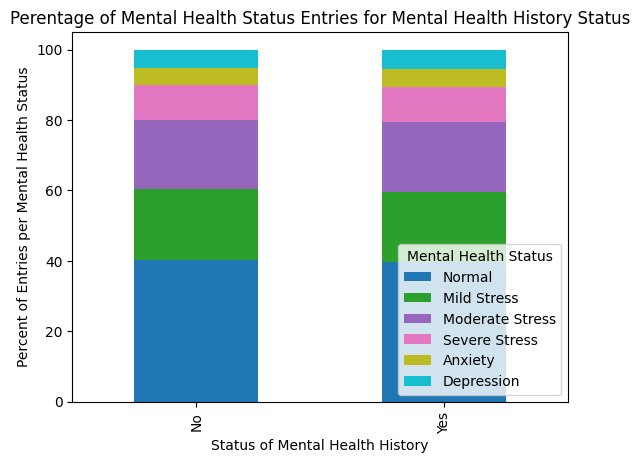

In [12]:
v2data = data.copy()

model_data = v2data[['Mental_Health_Status', 'Mental_Health_History']]
graph = model_data.groupby('Mental_Health_History').value_counts().unstack()
graph = graph[['Normal', 'Mild Stress', 'Moderate Stress', 'Severe Stress', 'Anxiety', 'Depression']]

graph_percent = graph.div(graph.sum(axis=1), axis=0) * 100
graph_percent.plot(kind='bar', stacked=True, colormap='tab10')

plt.xlabel('Status of Mental Health History')
plt.ylabel('Percent of Entries per Mental Health Status')
plt.legend(title = 'Mental Health Status', loc = 'lower right')
plt.title('Perentage of Mental Health Status Entries for Mental Health History Status')
plt.show()


*It seems that the percentages of mental health status is the same whether a driver someone does or doesn't have a mental health history.*

Graph work_hours to job_stressors (line graph)

Text(0.5, 1.0, 'Average Job Stress for Number of Hours Worked')

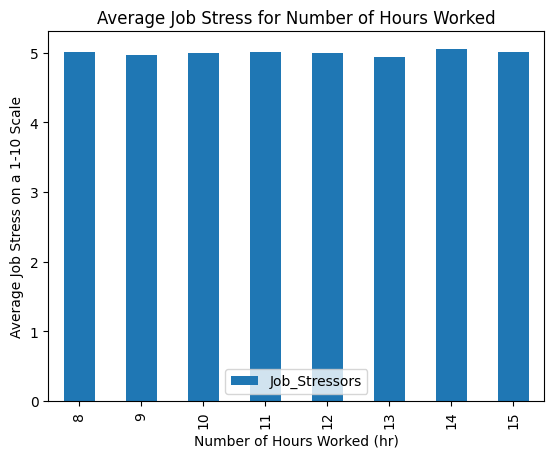

In [13]:
random = data.copy()
workjobdata = random[['Work_Hours', 'Job_Stressors']]
graph2 = workjobdata.groupby('Work_Hours').mean('Job_Stressors')
graph2.plot(kind='bar')
plt.xlabel('Number of Hours Worked (hr)')
plt.ylabel('Average Job Stress on a 1-10 Scale')
plt.title('Average Job Stress for Number of Hours Worked')

In [14]:
from scipy import stats

t_statistic, p_value = stats.ttest_1samp(graph2['Job_Stressors'], popmean=graph2['Job_Stressors'].mean())
f'The p-value for significance is {p_value} and the t-statistic {t_statistic}'


'The p-value for significance is 1.0 and the t-statistic 0.0'

*There does not seem to be a significant difference in job stress between drivers that worked between 8-15 hours (p>0.05).*

galvanic skin response graphed with job_stressors (scatter plot. See if there is a correlation)
- Add Pearson/Spearman correlation coefficient and possibly a trendline. (suggestion)

                        Galvanic_Skin_Response  Job_Stressors
Galvanic_Skin_Response                1.000000       0.000204
Job_Stressors                         0.000204       1.000000


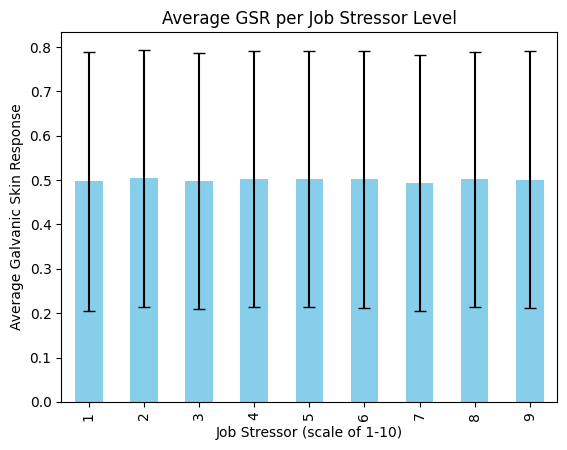

In [15]:
anotherrandom = data.copy()
skin_and_stress = anotherrandom[['Galvanic_Skin_Response', 'Job_Stressors']]

correlations = skin_and_stress.corr(method='pearson')
print(correlations)

means = skin_and_stress.groupby('Job_Stressors')['Galvanic_Skin_Response'].mean()
stds = skin_and_stress.groupby('Job_Stressors')['Galvanic_Skin_Response'].std()
means.plot(kind='bar', yerr=stds, capsize=4, color='skyblue')
plt.ylabel("Average Galvanic Skin Response")
plt.xlabel('Job Stressor (scale of 1-10)')
plt.title("Average GSR per Job Stressor Level")
plt.show()



*There is practically no correlation at all between Galvanic Skin Response and a driver's input for stress during their job.*

Average work hours per year, and graph it over time (line graph)

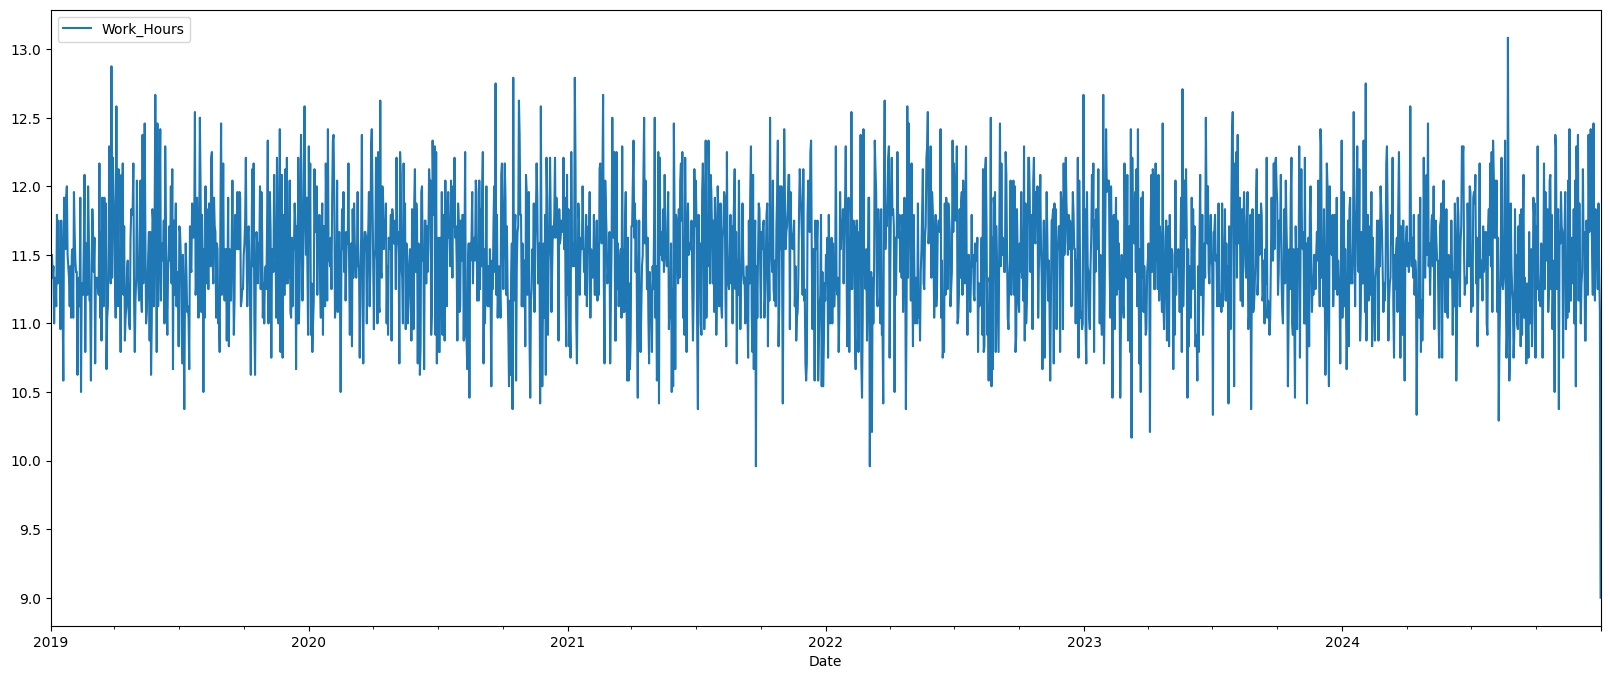

In [16]:
thisisacopy = data.copy()
workperdate = thisisacopy[['Date', 'Work_Hours']].copy()
workperdate['Date'] = pd.to_datetime(workperdate['Date'])
workperdate.sort_values(by='Date', inplace=True)
graph3 = workperdate.groupby('Date').mean('Work_Hours')
graph3.plot(kind='line', figsize=(20,8))
plt.show()

In [17]:
workperdate['Year'] = workperdate['Date'].dt.year
workperyear= workperdate.groupby('Year').mean('Work_Hours')
print(workperyear)

t_statistic2, p_value2 = stats.ttest_1samp(workperyear, popmean=workperyear['Work_Hours'].mean())
print(f'\nThe t-statistic is {t_statistic2} and the p-value is {p_value2}')

      Work_Hours
Year            
2019   11.480936
2020   11.520036
2021   11.478653
2022   11.508562
2023   11.466895
2024   11.478256

The t-statistic is [0.] and the p-value is [1.]


*The average number of work hours for a driver has not changed significantly from 2019 to the end of 2024.*

Route_Duration    0.03582
dtype: float64


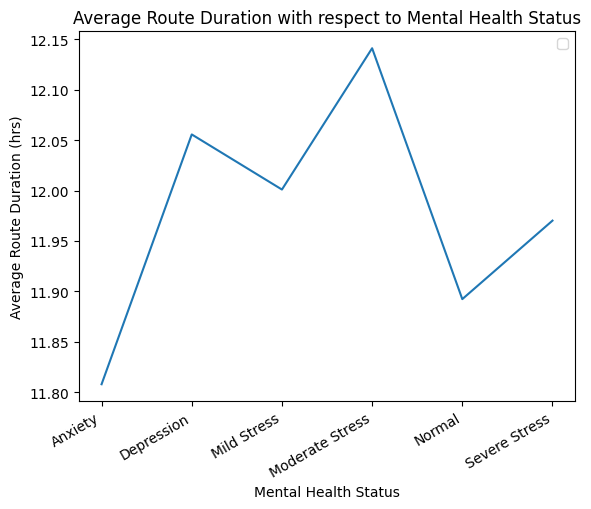

In [18]:
from sklearn.feature_selection import f_classif

df = data.copy()

X = df.select_dtypes(include='number')  # numeric features
y = df['Mental_Health_Status']

f_values, p_values = f_classif(X, y.factorize()[0])  # convert labels to ints
anova_results = pd.Series(p_values, index=X.columns).sort_values()
print(anova_results[anova_results < 0.05])

routedata = data[['Route_Duration', 'Mental_Health_Status']]
graph4 = routedata.groupby('Mental_Health_Status').mean('Route_Duration')
graph4.plot(kind='line')
plt.legend(labels= '')
plt.title('Average Route Duration with respect to Mental Health Status')
plt.xlabel("Mental Health Status")
plt.ylabel('Average Route Duration (hrs)')
plt.xticks(rotation=30, ha = 'right')
plt.show()

*Using an ANOVA test, we find that the only numeric variable with a significant difference with respect to mental health status is route duration. Plotting route duration shows that there are in fact some significant differences as opposed to other variables. These differences are still quite small (look at y-axis), but in comparison to other numeric variables, they are significant. (p < 0.05).*

Using location and longitutde, we can try to find a lot of things graphically based on location:
- job_stressor
- cognitive_load
- mental health status (descriptive variable, see if this is possible. Maybe a heatmap?)
- 

In [19]:
texas = gpd.read_file('Texas_State_Boundary_9188475293773017791.zip')
texas

,FIPS,CREATE_USE,CMNT,geometry
0,48,TPP,None,"POLYGON ((-11187636.512 4369621.983, -11187008..."
